# IBM Advanced Data Science Capstone

Hello everyone! 

For my Capstone Project I decided to use a Breast Cancer Dataset from Kaggle (https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data).

With this project my goals are to:
 - Understand the Dataset
 - Build classification models to predict whether the cancer type is Malignant or Benign
 - Compare the evaluation metrics of various classification algorithms
 
To do this I want to use Traditional Machine Learning Algorithms, such as KNN and SVM, and use a Deep Learning Algorithm, such as a Neural Network. Since I also wanted to learn and explore some options I also performed a fine-tuning of the hyperparameters for the SVM model.

Enjoy!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier

## Data Understanding and Cleanup

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Aegiel/ds_capstone/main/breast-cancer.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Identify Quality Issues

Check for any missing values in the dataset. If there are any, handle them appropriately (either by imputation or removal).

Check duplicate rows. If there are any, remove them.

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 0


No missing values nor duplicate rows were found, so no need to remove any of them.

### Assess Feature Correlation

Get a Correlation Matrix/Heatmap to see how the features correlate to each other.

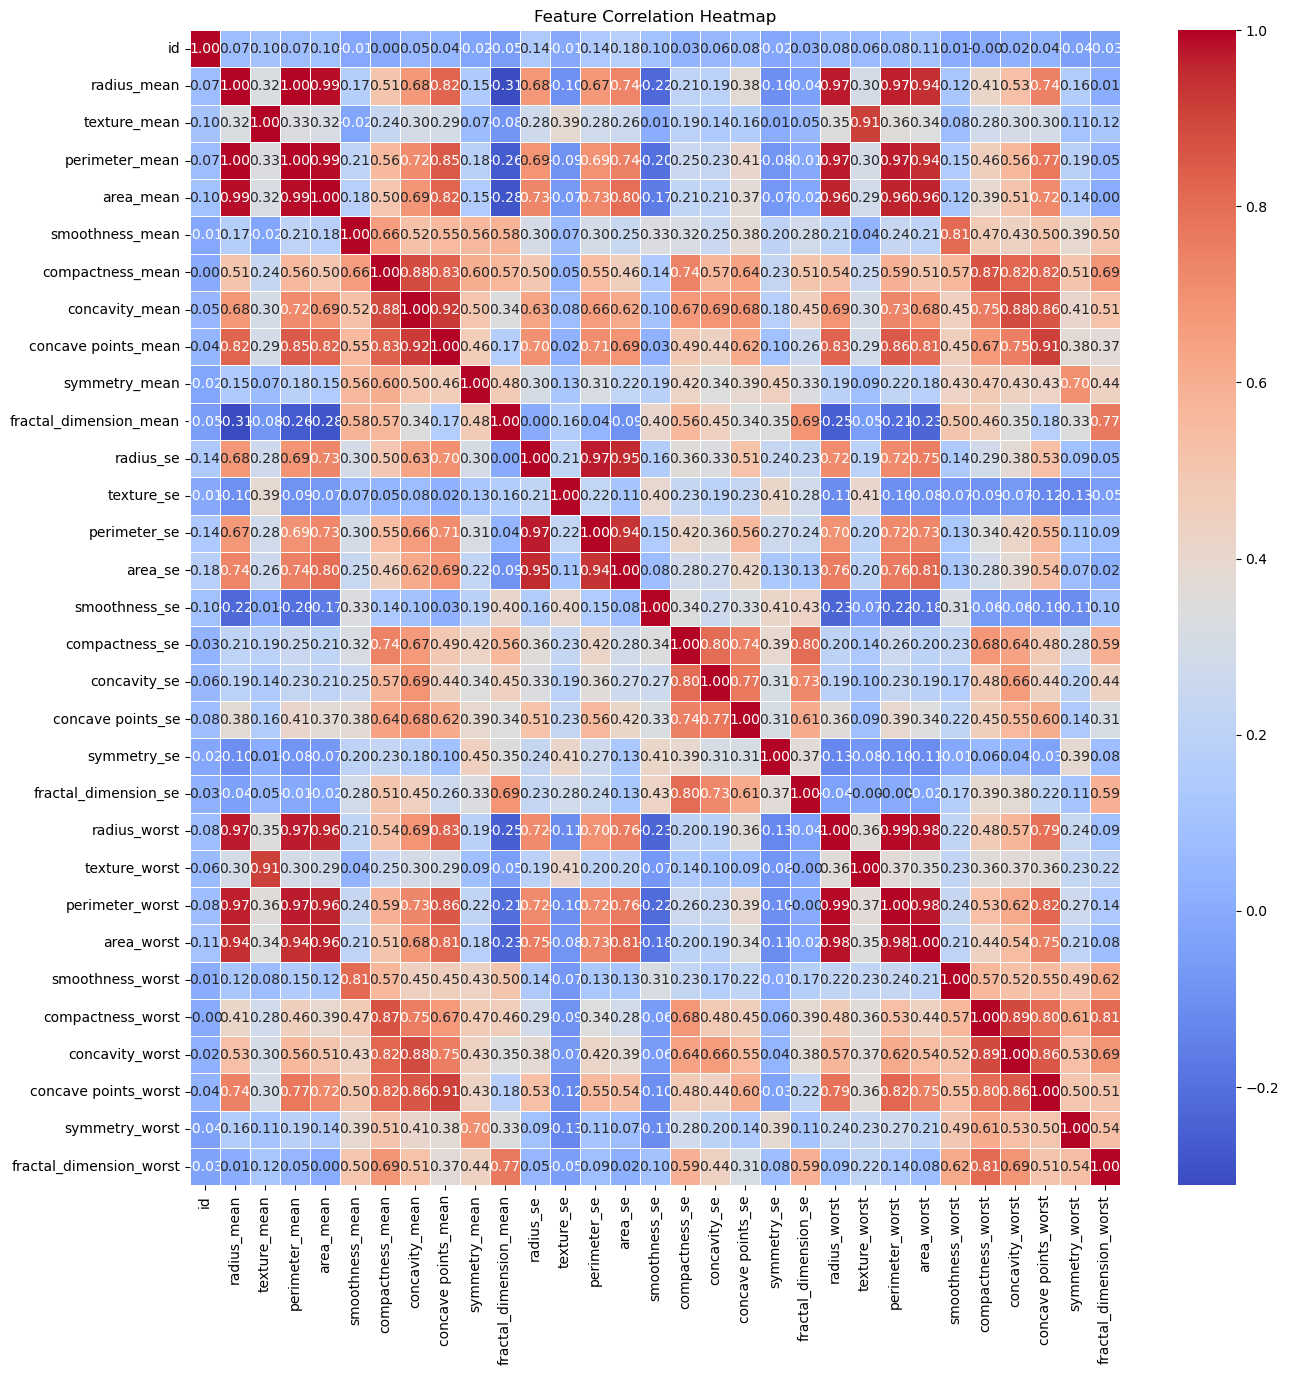

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Get an idea on the Features' Values Distribution and other statistics

In [8]:
# Display summary statistics
summary_statistics = df.drop(["id"],axis=1).describe()
print("Summary Statistics:\n")
display(summary_statistics)

Summary Statistics:



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


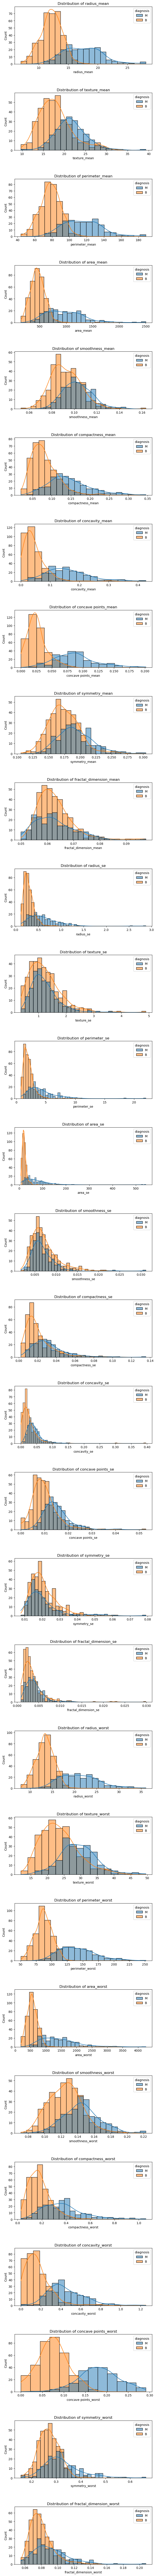

In [9]:
# Set up the figure with subplots dynamically
num_features = len(df.columns[2:])
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 5 * num_features))
fig.subplots_adjust(hspace=0.5)

# Plot value distributions
for i, column in enumerate(df.columns[2:]):
    sns.histplot(data=df, x=column, hue='diagnosis', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.show()

## Data Cleaning

Convert the 'diagnosis' column to numerical values, where 'M' (Malignant) is 1 and 'B' (Benign) is 0.

Drop the 'id' column as it is not relevant for classification.

In [10]:
df.drop(["id"],axis=1, inplace=True)

binary_diagnosis = df['diagnosis'].map({'M': 1, 'B': 0})

Since no other cleaning seemed necessary (no need to remove missing values, nor duplicate rows), this is all that I did for this section.

## Model Training and Evaluation

Here is where I create and train the models. Following the training I access 4 evaluation metrics:
- Accuracy
- Precision
- Recall
- F1-Score

In [11]:
# Split the data into features and target
X = df.drop(columns=['diagnosis'])
y = binary_diagnosis

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Support Vector Machine

In [12]:
# Build SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Model Evaluation

# Evaluation Metrics
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_scaled))
svm_precision = precision_score(y_test, svm_model.predict(X_test_scaled))
svm_recall = recall_score(y_test, svm_model.predict(X_test_scaled))
svm_f1 = f1_score(y_test, svm_model.predict(X_test_scaled))

# Print the evaluation metrics for the SVM
print("SVM Metrics:")
print("Accuracy: {:.3f}".format(svm_accuracy))
print("Precision: {:.3f}".format(svm_precision))
print("Recall: {:.3f}".format(svm_recall))
print("F1 Score: {:.3f}".format(svm_f1))

SVM Metrics:
Accuracy: 0.982
Precision: 1.000
Recall: 0.953
F1 Score: 0.976


### Neural Network

In [13]:
# Define Neural Network model
inputs = Input(shape=X_train_scaled.shape[-1])
x = Dense(16, activation='relu', kernel_initializer='random_normal')(inputs)
x = Dropout(0.4)(x)
x = Dense(16, activation='relu', kernel_initializer='random_normal')(x)
x = Dropout(0.4)(x)
x = Dense(25, activation='relu', kernel_initializer='random_normal')(x)
x = Dense(1, activation='sigmoid', kernel_initializer='random_normal')(x)
nn_model = Model(inputs=inputs, outputs=x)

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_scaled, y_train, epochs=140, verbose=0)

# Model Evaluation
# Predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Convert predictions to binary values
nn_predictions_binary = np.round(nn_predictions)

# Evaluate Neural Network model
nn_accuracy = accuracy_score(y_test, nn_predictions_binary)
nn_precision = precision_score(y_test, nn_predictions_binary)
nn_recall = recall_score(y_test, nn_predictions_binary)
nn_f1 = f1_score(y_test, nn_predictions_binary)

# Print the evaluation metrics for the Neural Network model
print("Neural Network Metrics:")
print("Accuracy: {:.3f}".format(nn_accuracy))
print("Precision: {:.3f}".format(nn_precision))
print("Recall: {:.3f}".format(nn_recall))
print("F1 Score: {:.3f}".format(nn_f1))

4/4 [==============================] - 0s 1ms/step
Neural Network Metrics:
Accuracy: 0.982
Precision: 0.977
Recall: 0.977
F1 Score: 0.977


### k-Nearest Neighbors

In [14]:
# Build k-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Evaluate k-Nearest Neighbors model
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test_scaled))
knn_precision = precision_score(y_test, knn_model.predict(X_test_scaled))
knn_recall = recall_score(y_test, knn_model.predict(X_test_scaled))
knn_f1 = f1_score(y_test, knn_model.predict(X_test_scaled))

# Print the evaluation metrics for the Neural Network model
print("KNN Metrics:")
print("Accuracy: {:.3f}".format(knn_accuracy))
print("Precision: {:.3f}".format(knn_precision))
print("Recall: {:.3f}".format(knn_recall))
print("F1 Score: {:.3f}".format(knn_f1))

KNN Metrics:
Accuracy: 0.947
Precision: 0.930
Recall: 0.930
F1 Score: 0.930


### Hyperparameter Tuning for SVM (GridSearchCV)

In [15]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters after GridSearchCV:", grid.best_params_)

# Compare with default model
svm_model_default = SVC()
svm_model_default.fit(X_train_scaled, y_train)

# Evaluate default model
accuracy_default = accuracy_score(y_test, svm_model_default.predict(X_test_scaled))
f1_default = f1_score(y_test, svm_model_default.predict(X_test_scaled))

# Evaluate Neural Network model
svm_tuned_accuracy = accuracy_score(y_test, grid.predict(X_test_scaled))
svm_tuned_precision = precision_score(y_test, grid.predict(X_test_scaled))
svm_tuned_recall = recall_score(y_test, grid.predict(X_test_scaled))
svm_tuned_f1 = f1_score(y_test, grid.predict(X_test_scaled))

# Print the evaluation metrics for the Neural Network model
print("SVM Tuned Metrics:")
print("Accuracy: {:.3f}".format(svm_tuned_accuracy))
print("Precision: {:.3f}".format(svm_tuned_precision))
print("Recall: {:.3f}".format(svm_tuned_recall))
print("F1 Score: {:.3f}".format(svm_tuned_f1))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

## Results

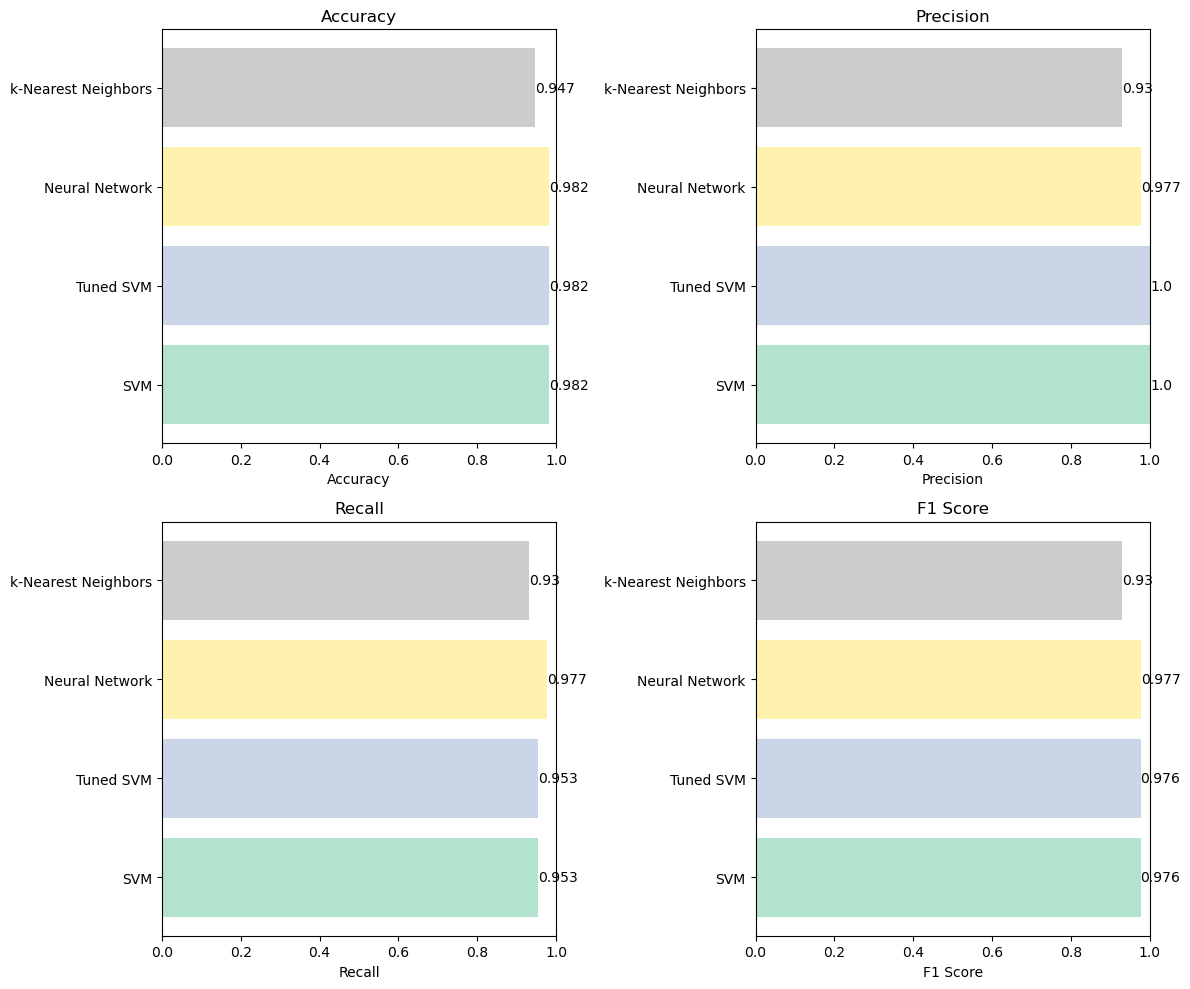

In [16]:
# Metrics for SVM
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1]

# Metrics for Tuned SVM
tuned_svm_metrics = [svm_tuned_accuracy, svm_tuned_precision, svm_tuned_recall, svm_tuned_f1]

# Metrics for Neural Network
nn_metrics = [nn_accuracy, nn_precision, nn_recall, nn_f1]

# Metrics for k-Nearest Neighbors
knn_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1]

# Metrics labels
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, ax in enumerate(axes.flatten()):
    bars = ax.barh(['SVM', 'Tuned SVM', 'Neural Network', 'k-Nearest Neighbors'],
                  [svm_metrics[i], tuned_svm_metrics[i], nn_metrics[i], knn_metrics[i]],
                  color=plt.cm.Pastel2(np.linspace(0, 1, 4)))
    
    # Display values at the end of each bar
    for bar in bars:
        yval = bar.get_y() + bar.get_height() / 2
        ax.text(bar.get_width(), yval, round(bar.get_width(), 3), va='center', ha='left')

    ax.set_title(metric_labels[i])
    ax.set_xlabel(metric_labels[i])
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()

The Support Vector Machine (SVM) model demonstrated high accuracy, precision, and F1 score, indicating its effectiveness in classifying breast tumors as malignant or benign. The recall rate of 95.3% indicates the model's ability to correctly identify a high percentage of actual malignant cases.

The K-Nearest Neighbors (KNN) model achieved a commendable accuracy and balanced precision and recall scores. With an accuracy of 94.7%, the KNN model is reliable in distinguishing between malignant and benign tumors.

The Neural Network model demonstrate high accuracy and balanced precision and recall. The F1 score of 97.7% highlights the overall effectiveness of the neural network in breast cancer classification.

The SVM model, fine-tuned using GridSearchCV, maintained its high performance, aligning exactly with the untuned SVM model. The optimized hyperparameters (C=100, Gamma=0.001) did not significantly alter the model's classification effectiveness.

When comparing the three models (SVM, KNN, Neural Network), it is evident that the Neural Network model excelled in terms of accuracy, recall, and F1 score. The SVM and KNN models also performed well, demonstrating their suitability for the breast cancer classification task.

The choice between models depends on the specific requirements of the application. If precision and recall are equally important, both the Neural Network and SVM models are competitive choices.
For scenarios where interpretability is crucial, SVM could be a suitable choice.
KNN, with its simplicity and competitive performance, might be favored in certain contexts.

## Conclusion

In the comprehensive evaluation of breast cancer classification models, the **Neural Network (NN) emerges as the standout performer**, showcasing a remarkable **F1 score of 97.7%**. The **strategic choice of the F1 score** as the primary performance metric proves to be particularly pertinent in the medical context, where precision and recall are of paramount importance. The F1 score encapsulates the delicate balance between minimizing false positives (misclassifying benign cases as malignant) and false negatives (misclassifying malignant cases as benign). In medical decision-making, such as breast cancer diagnosis, the consequences of these errors are significant. The NN model's exceptional F1 score signifies its effectiveness in achieving this delicate equilibrium, providing a robust and reliable screening tool. The emphasis on a balanced metric like F1 underscores the commitment to minimizing both types of errors, ensuring that the model not only identifies malignant cases accurately but also avoids unnecessary alarm for benign cases. As we navigate the intricate landscape of breast cancer classification, the Neural Network, with its high F1 score, stands as a beacon of precision and recall harmony, contributing to enhanced diagnostic accuracy and patient care.